# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

Зчитую дані з файлу у датафрейм


In [181]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'clean_data2.csv'
df = pd.read_csv(path)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660


<p>З попередньої роботи знаємо, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population</li>
    <li>Area</li>
</ul>
Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

<p>Створюю об’єкт лінійної регресії та навчаю першу модель</p>


In [182]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.linear_model import LinearRegression

lm1=LinearRegression()
X1 = df[['Population']] #remember that X should be a 2D array!!
Y = df['CO2 emission']

lm1.fit(X1,Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [183]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('intercept (a): ', lm1.intercept_)
print('slope (b): ', lm1.coef_)

intercept (a):  -782.8642541441368
slope (b):  [0.00483347]


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat1 = a + b  X
$$

Підставляючи фактичні значення, маємо:

In [184]:
# Напишіть рівняння моделі, виконувати не потрібно
Yhat1 = -782.86 + 0.0048 * X1

Створюю об’єкт лінійної регресії та навчаю другу модель


In [185]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.linear_model import LinearRegression

lm2=LinearRegression()
X2 = df[['Area']]
#Y = df['CO2 emission']

lm2.fit(X2,Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [186]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('intercept (a): ', lm2.intercept_)
print('slope (b): ', lm2.coef_)

intercept (a):  4533.356954246119
slope (b):  [0.259485]


Отримали кінцеву лінійну модель зі структурою:
$$
Yhat2 = a + b  X
$$

Підставляючи фактичні значення, маємо:


In [187]:
# Напишіть рівняння моделі, виконувати не потрібно
Yhat2 = 4533.35 + 0.2594 * X2

<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [188]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

lm3=LinearRegression()
Z = df[['Population', 'Area']]
#Y = df['CO2 emission']

lm3.fit(Z,Y)

LinearRegression()

Знаходжу коефіцієнти моделі


In [189]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
print('intercept (a): ', lm3.intercept_)
print('slope (b): ', lm3.coef_)

intercept (a):  -51153.701189420506
slope (b):  [0.00407087 0.12369062]


Підставляючи фактичні значення, маємо:

In [190]:
# Напишіть рівняння моделі, виконувати не потрібно
Yhat3 = -51153.7 + 0.00407 * X1 + 0.12369 * X2

<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

Знаходжу коефіцієнти моделі


In [191]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
x1 = df['Population']
y = df['CO2 emission']

f1 = np.polyfit(x1, y, 2)
Yhat4 = np.poly1d(f1)
print(Yhat4)
print('Coefficients:', f1)

            2
-3.004e-13 x + 0.00521 x - 7948
Coefficients: [-3.00399768e-13  5.21002024e-03 -7.94817527e+03]


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

Знаходжу коефіцієнти моделі


In [192]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
x2 = df['Area']
#y = df['CO2 emission']

f2 = np.polyfit(x2, y, 2)
Yhat5 = np.poly1d(f2)
print(Yhat5)
print('Coefficients:', f2)

            2
-1.484e-08 x + 0.436 x - 4.963e+04
Coefficients: [-1.48432091e-08  4.35953407e-01 -4.96265035e+04]


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

Знаходжу коефіцієнти моделі


In [193]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pr = PolynomialFeatures(degree=2)
# print(Z.shape)
Z_pr = pr.fit_transform(Z)
# print(Z_pr.shape)

lm_poly = LinearRegression()
lm_poly.fit(Z_pr, Y)

print('intercept (a): ', lm_poly.intercept_)
print('slope (b): ', lm_poly.coef_)


intercept (a):  13674.992596644443
slope (b):  [ 0.00000000e+00  2.26971549e-03  2.19204356e-02 -3.11058455e-12
  1.02011340e-09 -4.10609831e-09]


<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


(0.0, 10812571.06543793)

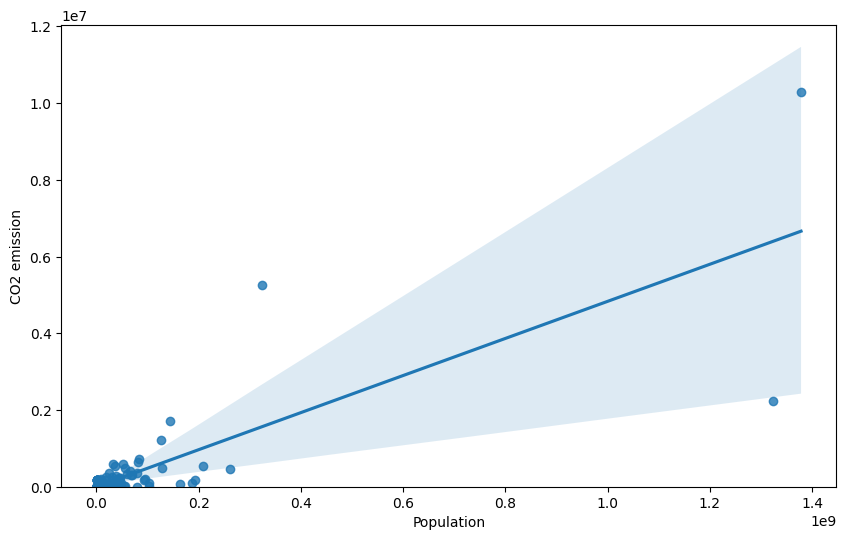

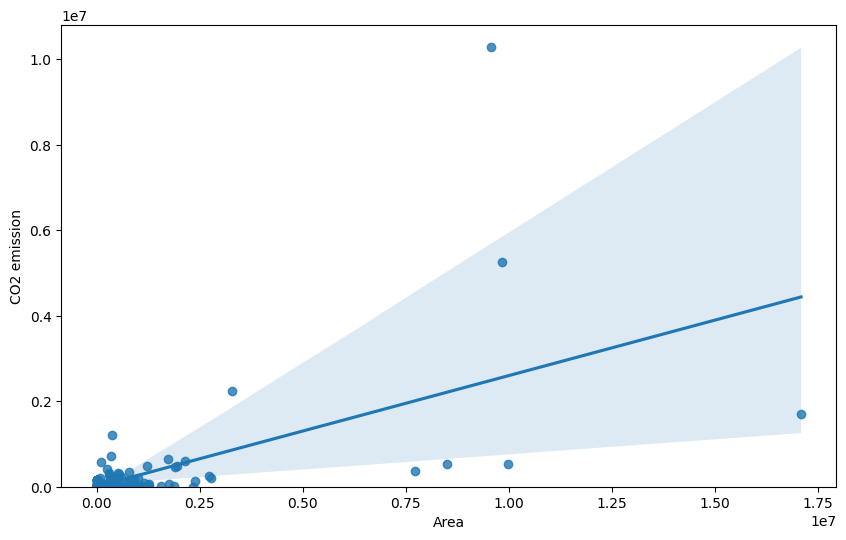

In [194]:
import seaborn as sns
%matplotlib inline
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
width = 10
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x=X1, y=Y, data=df)
plt.xlabel(X1.columns[0])
plt.ylabel(Y.name)
plt.ylim(0,)

plt.figure(figsize=(width, height))
sns.regplot(x=X2, y=Y, data=df)
plt.xlabel(X2.columns[0])
plt.ylabel(Y.name)
plt.ylim(0,)

Для візуалізації дисперсії даних використаю діаграми залишків - по ній зможу прийняти рішення про необхідність ускладнення моделі.


<Axes: xlabel='Area', ylabel='CO2 emission'>

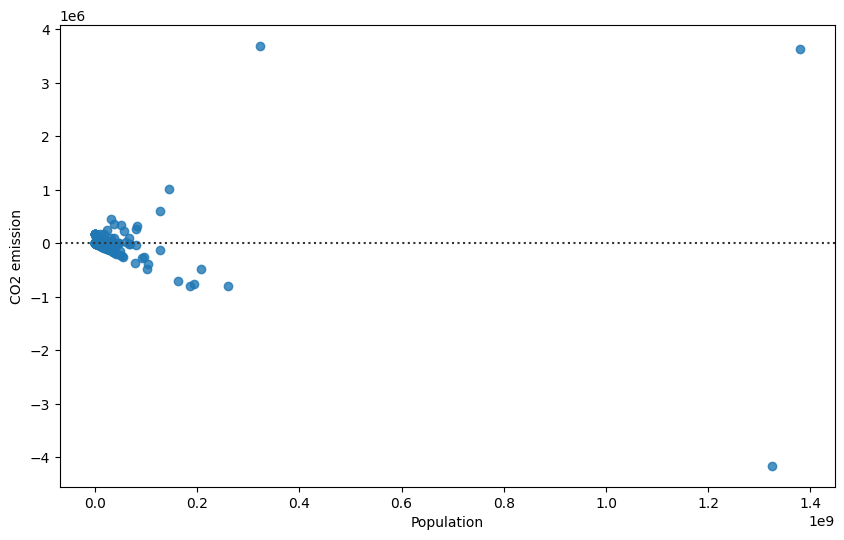

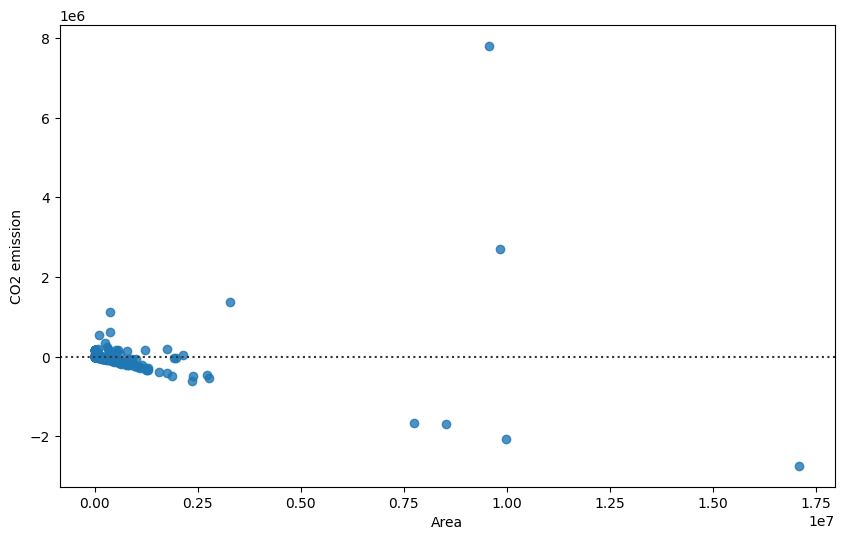

In [195]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
plt.figure(figsize=(width, height))
sns.residplot(x=X1, y=Y)

plt.figure(figsize=(width, height))
sns.residplot(x=X2, y=Y)

Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


/var/folders/gj/d30kkjdn37n1x7z794t6qtm00000gn/T/ipykernel_12034/1341499942.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist=False, color='r', label='Actual Value')
/var/folders/gj/d30kkjdn37n1x7z794t6qtm00000gn/T/ipykernel_12034/1341499942.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

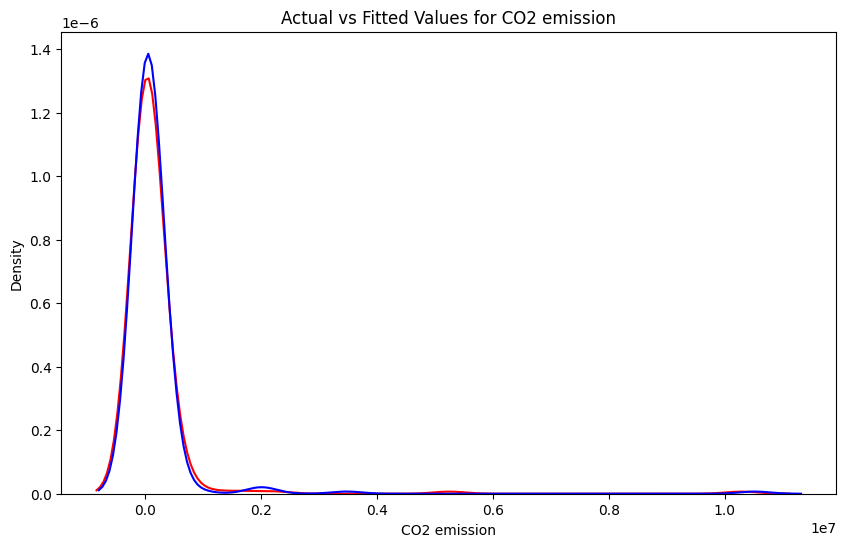

In [196]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
Yhat6 = lm_poly.predict(Z_pr)
plt.figure(figsize=(width, height))

ax1 = sns.distplot(Y, hist=False, color='r', label='Actual Value')
sns.distplot(Yhat6, hist=False, color='b', label='Predicted Value', ax=ax1)
plt.title('Actual vs Fitted Values for CO2 emission')
plt.xlabel('CO2 emission')
plt.ylabel('Density')
plt.show()

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію <code>poly1d</code>. Зручно розміщувати всі моделі на одному графіку для обрання найкращої.


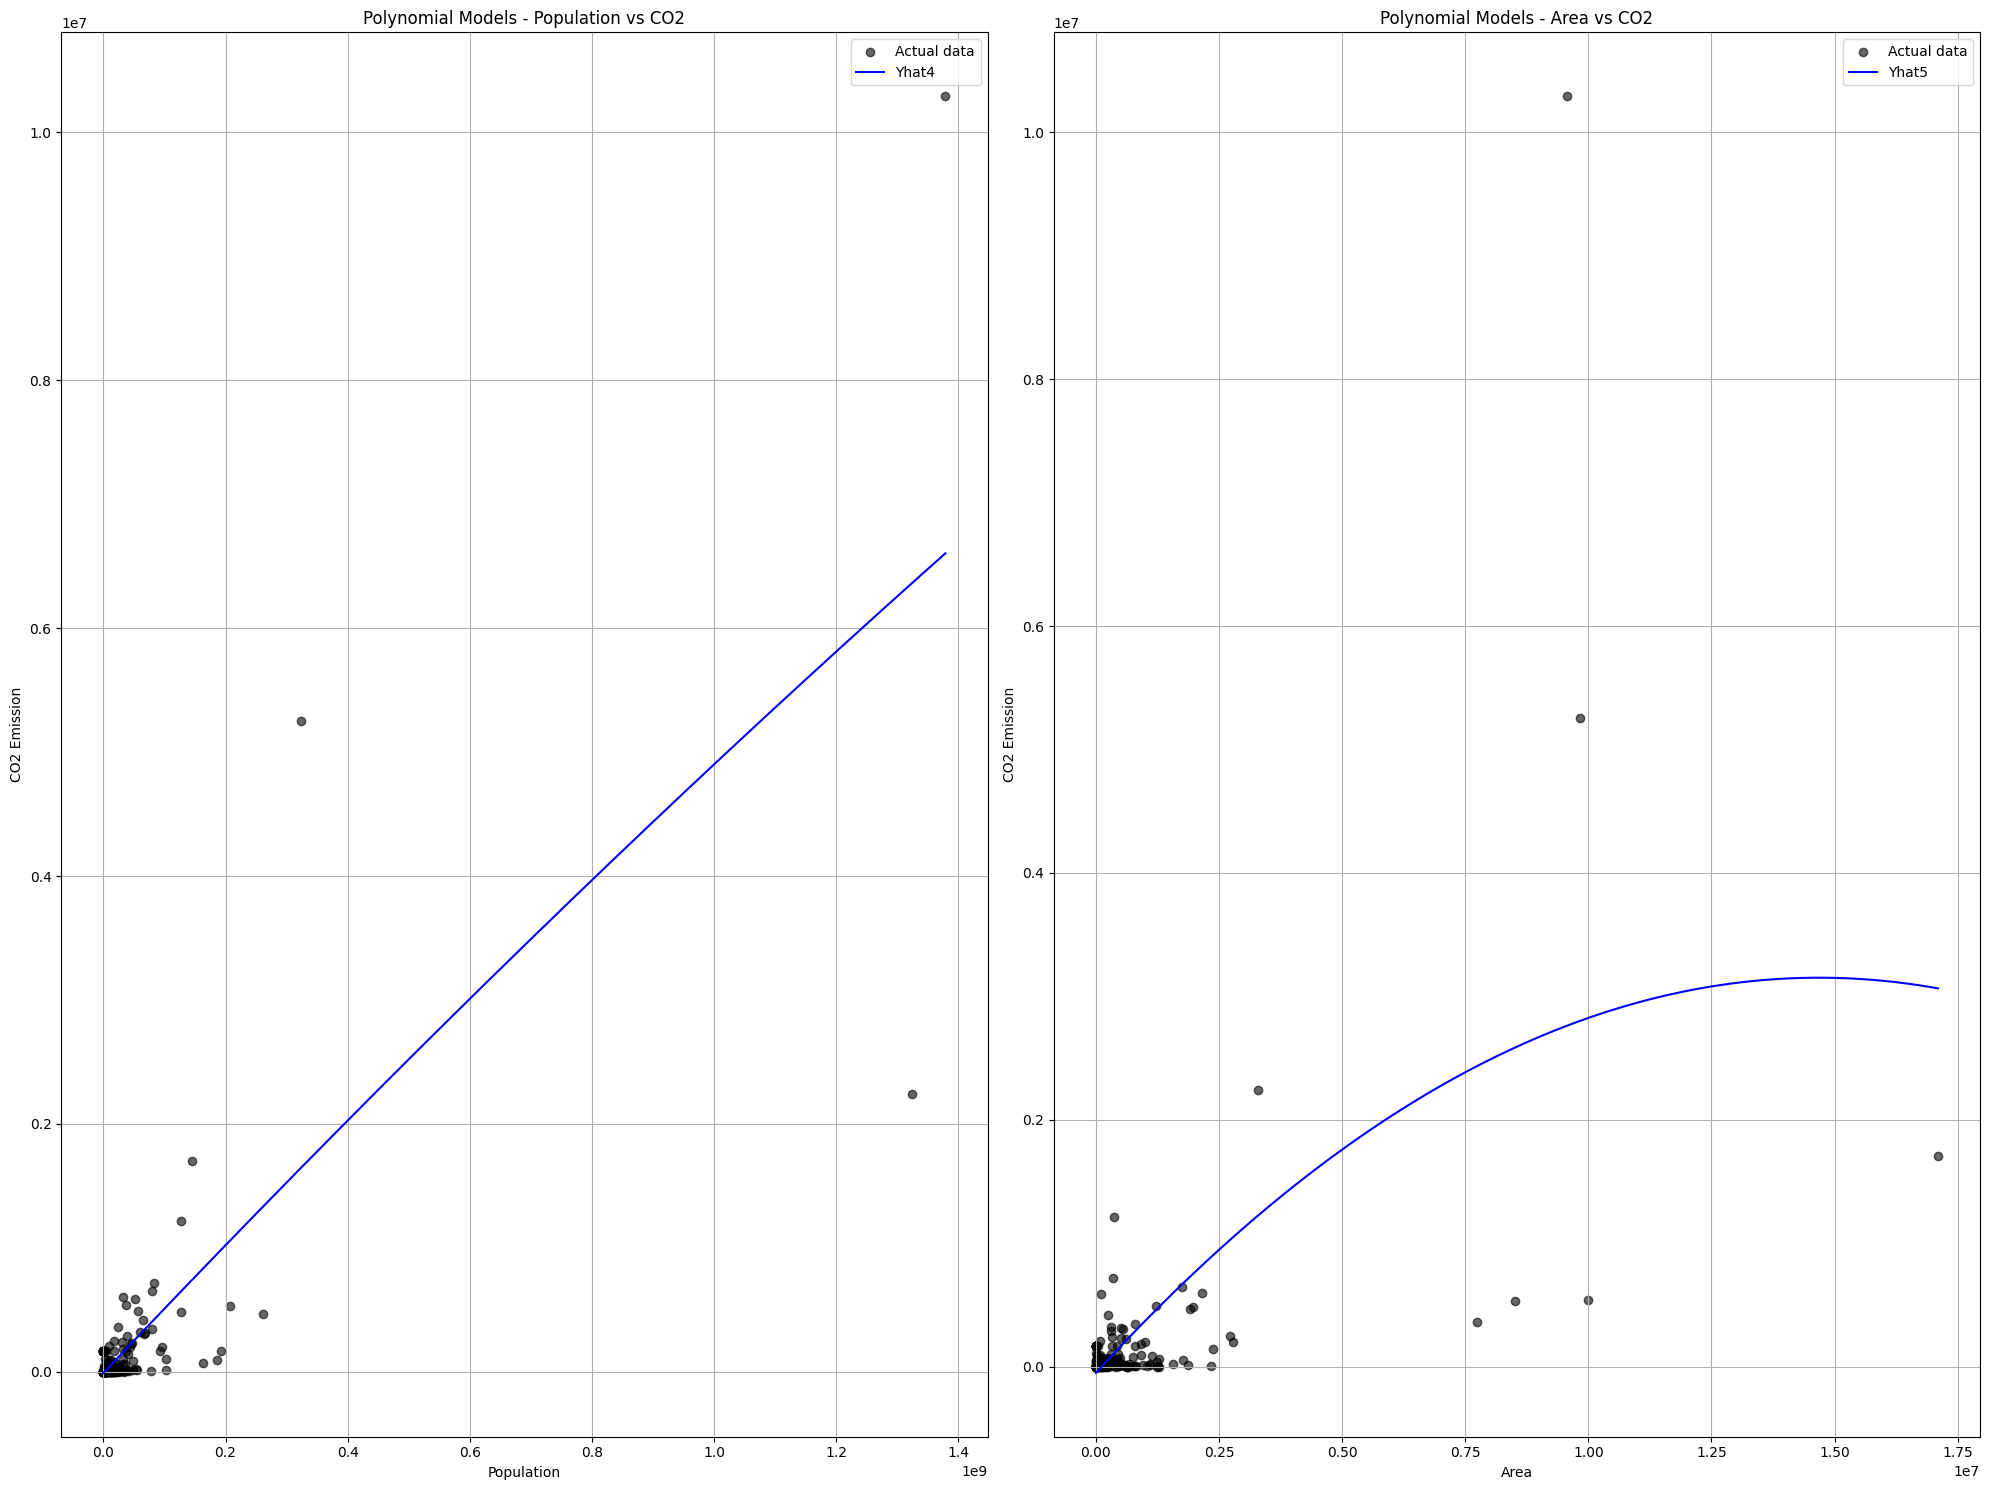

In [197]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
x1_sort = np.linspace(x1.min(), x1.max(), 217)
x2_sort = np.linspace(x2.min(), x2.max(), 217)

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.scatter(x1, y, color='black', label='Actual data', alpha=0.6)
plt.plot(x1_sort, Yhat4(x1_sort), label='Yhat4', color='blue')

plt.title('Polynomial Models - Population vs CO2')
plt.xlabel('Population')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x2, y, color='black', label='Actual data', alpha=0.6)
plt.plot(x2_sort, Yhat5(x2_sort), label='Yhat5', color='blue')

plt.title('Polynomial Models - Area vs CO2')
plt.xlabel('Area')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


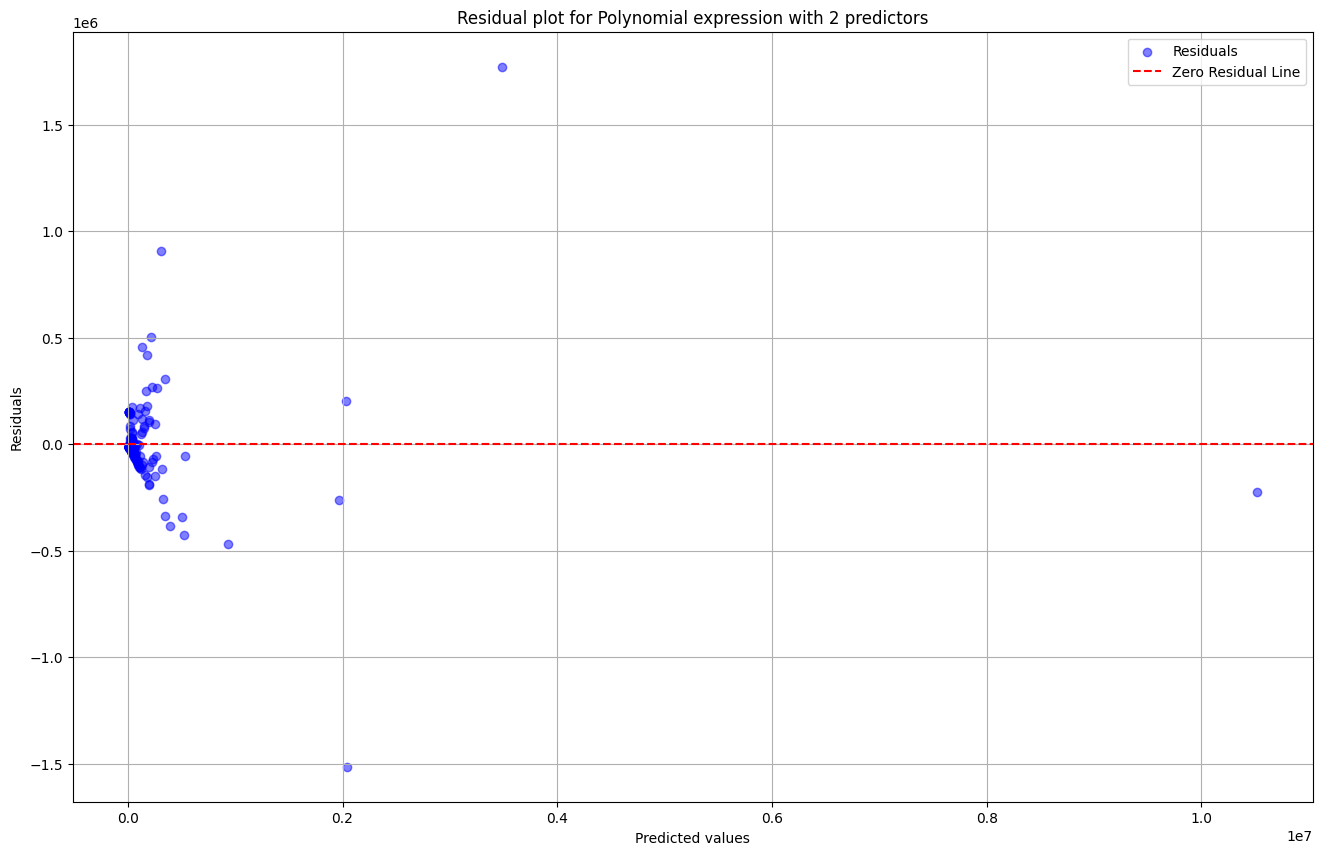

In [198]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
def ResidualPlot(model, predictors, actual, model_name):
    predicted = model.predict(predictors)

    residuals = actual - predicted

    plt.figure(figsize=(16, 10))
    plt.scatter(predicted, residuals, alpha=0.5, color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.title(f'Residual plot for {model_name}')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid()
    plt.show()

ResidualPlot(lm_poly, Z_pr, Y, 'Polynomial expression with 2 predictors')

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


Модель 1:
$$
Yhat1 = a + b  X
$$


In [199]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r1 = lm1.score(X1, Y)
print('The R-square of first model is: ', r1)

predicted1 = lm1.predict(X1)

comparison_table1 = pd.DataFrame({
    'Actual': Y,
    'Predicted': predicted1
})

print(f'\n{comparison_table1.head(10)}\n')

from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(Y, predicted1)
print('The mean square error of co2 emission and predicted value is: ', mse1)

The R-square of first model is:  0.64357552331178

          Actual      Predicted
0    9809.225000  166725.943040
1    5716.853000   13118.676700
2  145400.217000  195485.171840
3  165114.116337    -514.128290
4     462.042000    -409.329046
5   34763.160000  138486.075166
6     531.715000    -294.862866
7  204024.546000  211152.267334
8    5529.836000   13354.139074
9     872.746000    -276.210515

The mean square error of co2 emission and predicted value is:  232801816740.8335


Модель 2:
$$
Yhat2 = a + b  X
$$

In [200]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r2 = lm2.score(X2, Y)
print('The R-square of second model is: ', r2)

predicted2 = lm2.predict(X2)

comparison_table2 = pd.DataFrame({
    'Actual': Y,
    'Predicted': predicted2
})

print(f'\n{comparison_table2.head(10)}\n')

from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(Y, predicted2)
print('The mean square error of co2 emission and predicted value is: ', mse2)

The R-square of second model is:  0.3428242103659921

          Actual      Predicted
0    9809.225000  173940.731413
1    5716.853000   11993.550588
2  145400.217000  622559.151217
3  165114.116337    4585.253953
4     462.042000    4655.314902
5   34763.160000  328033.301410
6     531.715000    4647.530352
7  204024.546000  726005.439704
8    5529.836000   12250.440734
9     872.746000    4580.064254

The mean square error of co2 emission and predicted value is:  429240211464.8186


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [201]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
r3 = lm3.score(Z, Y)
print('The R-square of third model is: ', r3)

predicted3 = lm3.predict(Z)

comparison_table3 = pd.DataFrame({
    'Actual': Y,
    'Predicted': predicted3
})

print(f'\n{comparison_table3.head(10)}\n')

from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(Y, predicted3)
print('The mean square error of co2 emission and predicted value is: ', mse3)

The R-square of third model is:  0.7054520179027688

          Actual      Predicted
0    9809.225000  170679.084768
1    5716.853000  -35889.368655
2  145400.217000  408747.068813
3  165114.116337  -50902.626882
4     462.042000  -50780.965857
5   34763.160000  220347.195847
6     531.715000  -50688.270282
7  204024.546000  471252.792909
8    5529.836000  -35568.602612
9     872.746000  -50704.720364

The mean square error of co2 emission and predicted value is:  192386634012.13107


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [202]:
# Імпортуємо функцію r2_score з модуля metrics, оскільки використовуємо іншу функцію
from sklearn.metrics import r2_score

predicted4 = Yhat4(x1)
r2_1 = r2_score(y, predicted4)
print('The R-square of fourth model is: ', r2_1)

comparison_table4 = pd.DataFrame({
    'Actual': y,
    'Predicted': predicted4
})

print(f'\n{comparison_table4.head(10)}\n')

from sklearn.metrics import mean_squared_error
mse4 = mean_squared_error(y, predicted4)
print('The mean square error of co2 emission and predicted value is: ', mse4)


The R-square of fourth model is:  0.6438906091527726

          Actual      Predicted
0    9809.225000  172249.660644
1    5716.853000    7033.884266
2  145400.217000  203114.862990
3  165114.116337   -7658.504280
4     462.042000   -7545.541486
5   34763.160000  141921.153606
6     531.715000   -7422.159055
7  204024.546000  219920.274848
8    5529.836000    7287.605512
9     872.746000   -7402.053826

The mean square error of co2 emission and predicted value is:  232596015621.63437


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [203]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.metrics import r2_score

predicted5 = Yhat5(x2)
r2_2 = r2_score(y, predicted5)
print('The R-square of fourth model is: ', r2_2)

comparison_table5 = pd.DataFrame({
    'Actual': y,
    'Predicted': predicted5
})

print(f'\n{comparison_table5.head(10)}\n')

from sklearn.metrics import mean_squared_error
mse5 = mean_squared_error(y, predicted5)
print('The mean square error of co2 emission and predicted value is: ', mse5)


The R-square of fourth model is:  0.36985239059644315

          Actual     Predicted
0    9809.225000  2.286635e+05
1    5716.853000 -3.710511e+04
2  145400.217000  9.045003e+05
3  165114.116337 -4.953931e+04
4     462.042000 -4.942161e+04
5   34763.160000  4.708064e+05
6     531.715000 -4.943469e+04
7  204024.546000  1.047751e+06
8    5529.836000 -3.667438e+04
9     872.746000 -4.954803e+04

The mean square error of co2 emission and predicted value is:  411586515177.42316


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [204]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.metrics import r2_score

predicted6 = lm_poly.predict(Z_pr)
r2_3 = r2_score(Y, predicted6)
print('The R-square of fourth model is: ', r2_3)

comparison_table6 = pd.DataFrame({
    'Actual': Y,
    'Predicted': predicted6
})

print(f'\n{comparison_table5.head(10)}\n')

from sklearn.metrics import mean_squared_error
mse6 = mean_squared_error(y, predicted6)
print('The mean square error of co2 emission and predicted value is: ', mse6)


The R-square of fourth model is:  0.9359013231505963

          Actual     Predicted
0    9809.225000  2.286635e+05
1    5716.853000 -3.710511e+04
2  145400.217000  9.045003e+05
3  165114.116337 -4.953931e+04
4     462.042000 -4.942161e+04
5   34763.160000  4.708064e+05
6     531.715000 -4.943469e+04
7  204024.546000  1.047751e+06
8    5529.836000 -3.667438e+04
9     872.746000 -4.954803e+04

The mean square error of co2 emission and predicted value is:  41866620833.33285


<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель 6 є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>


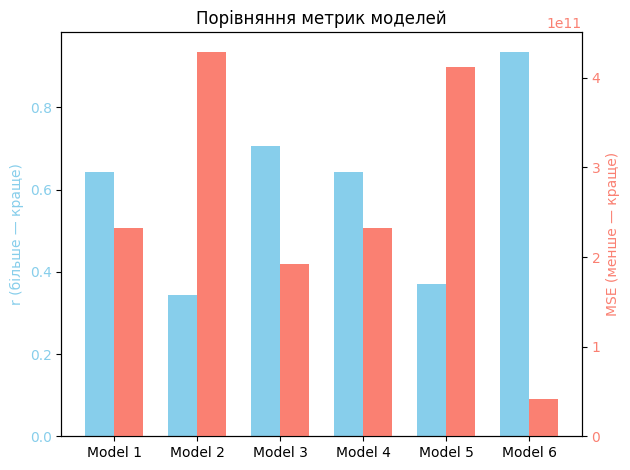

In [205]:
r = [r1, r2, r3, r2_1, r2_2, r2_3]
mse = [mse1, mse2, mse3, mse4, mse5, mse6]
labels = [f'Model {i+1}' for i in range(6)]

x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots()
bars1 = ax1.bar(x - width/2, r, width, label='r', color='skyblue')
ax1.set_ylabel('r (більше — краще)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, mse, width, label='MSE', color='salmon')
ax2.set_ylabel('MSE (менше — краще)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.xticks(x, labels)
plt.title('Порівняння метрик моделей')
fig.tight_layout()
plt.show()

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей (зручно розміщувати всі моделі на одному графіку для обрання найкращої).
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі (теж доцільно побудувати графік залежності R^2 або MSE від порядку поліному моделі).
4. Оберіть найкращу модель, висновок обгрунтуйте.


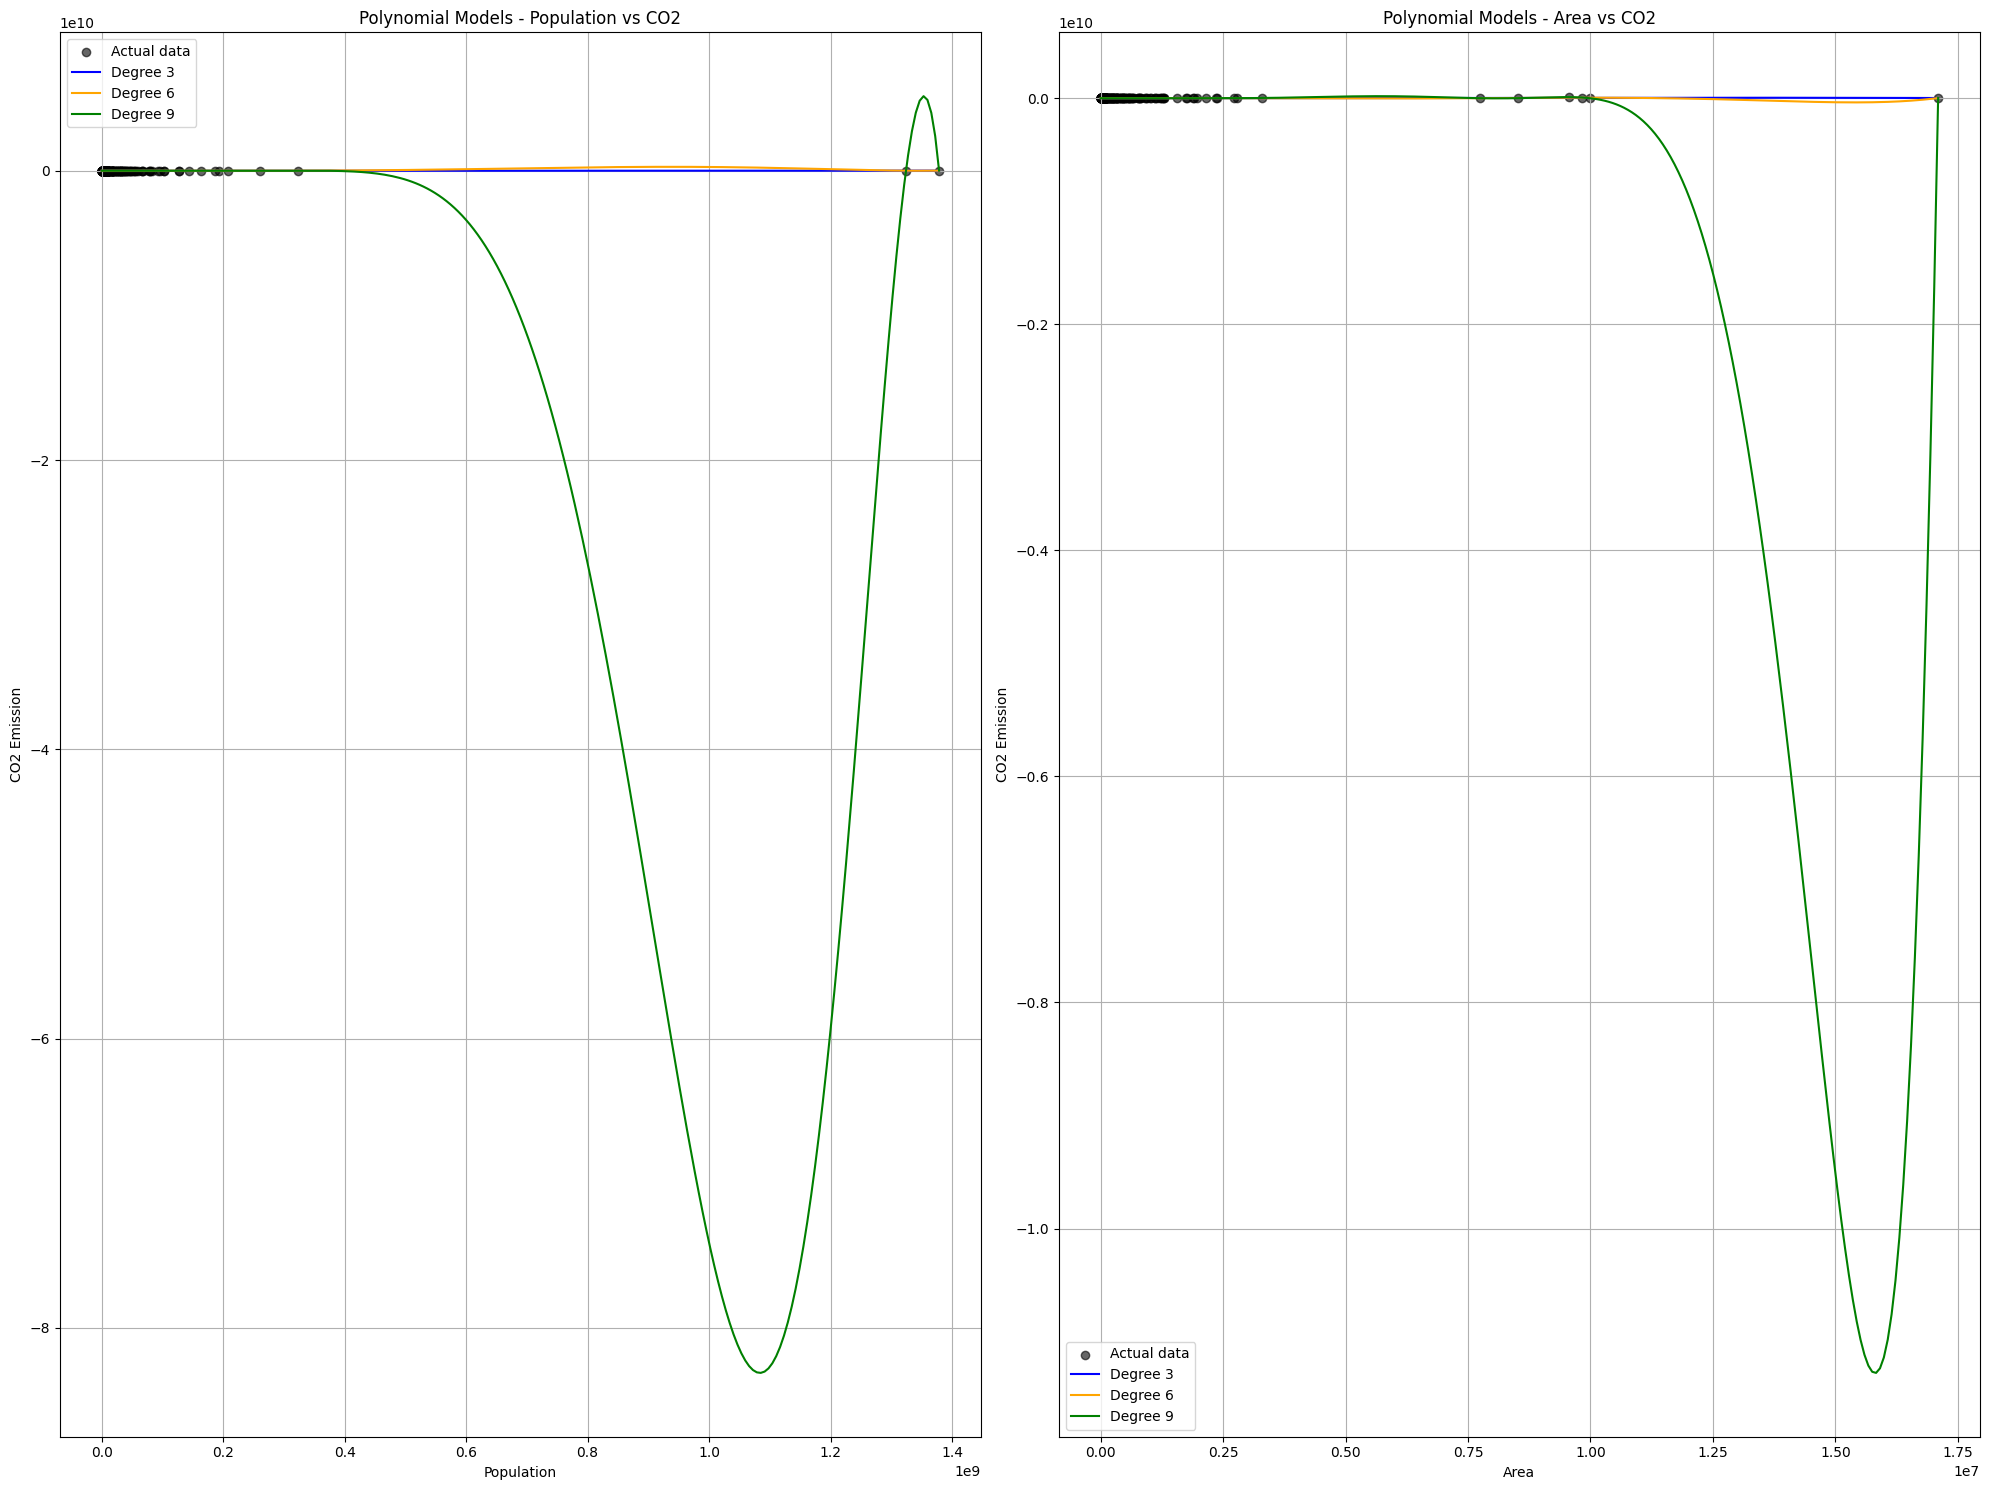

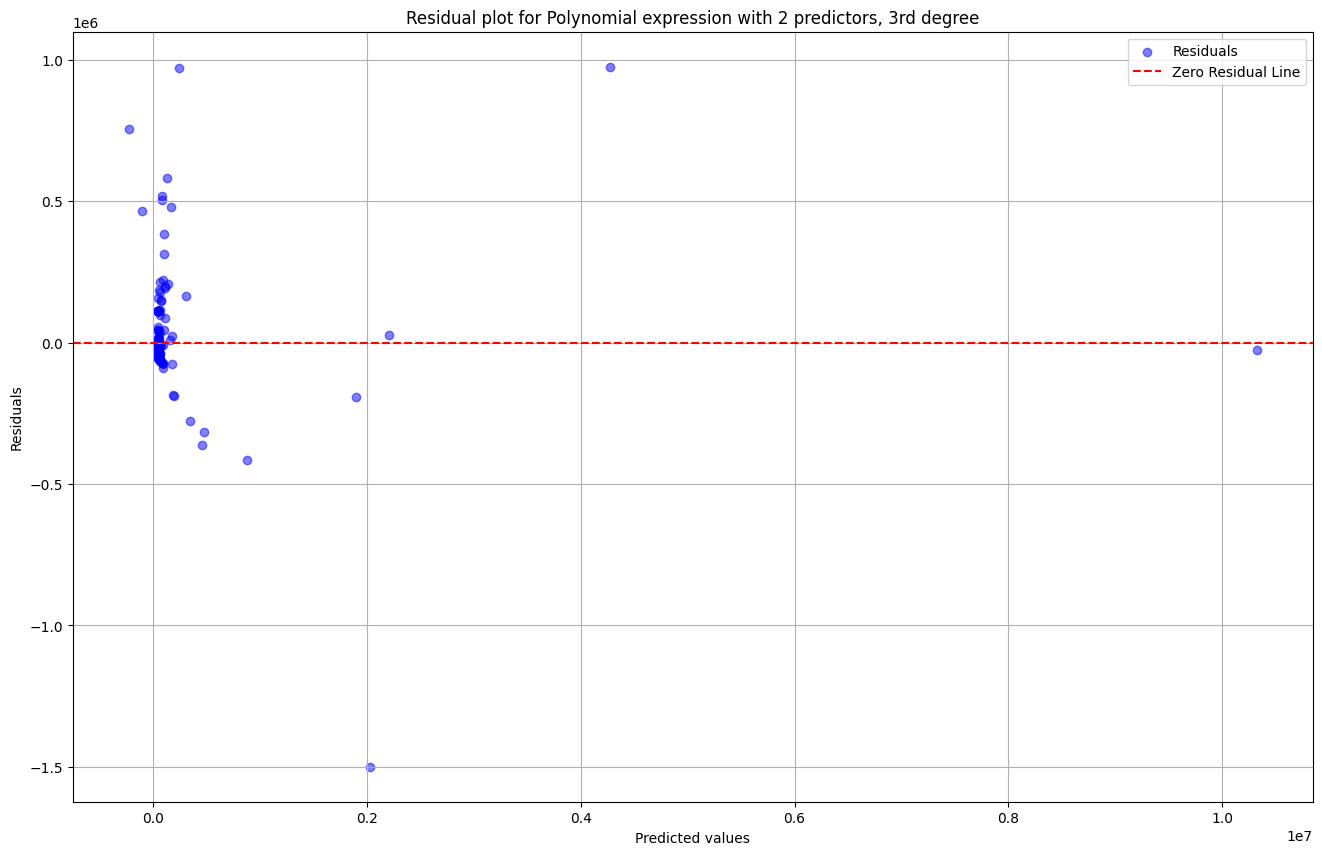

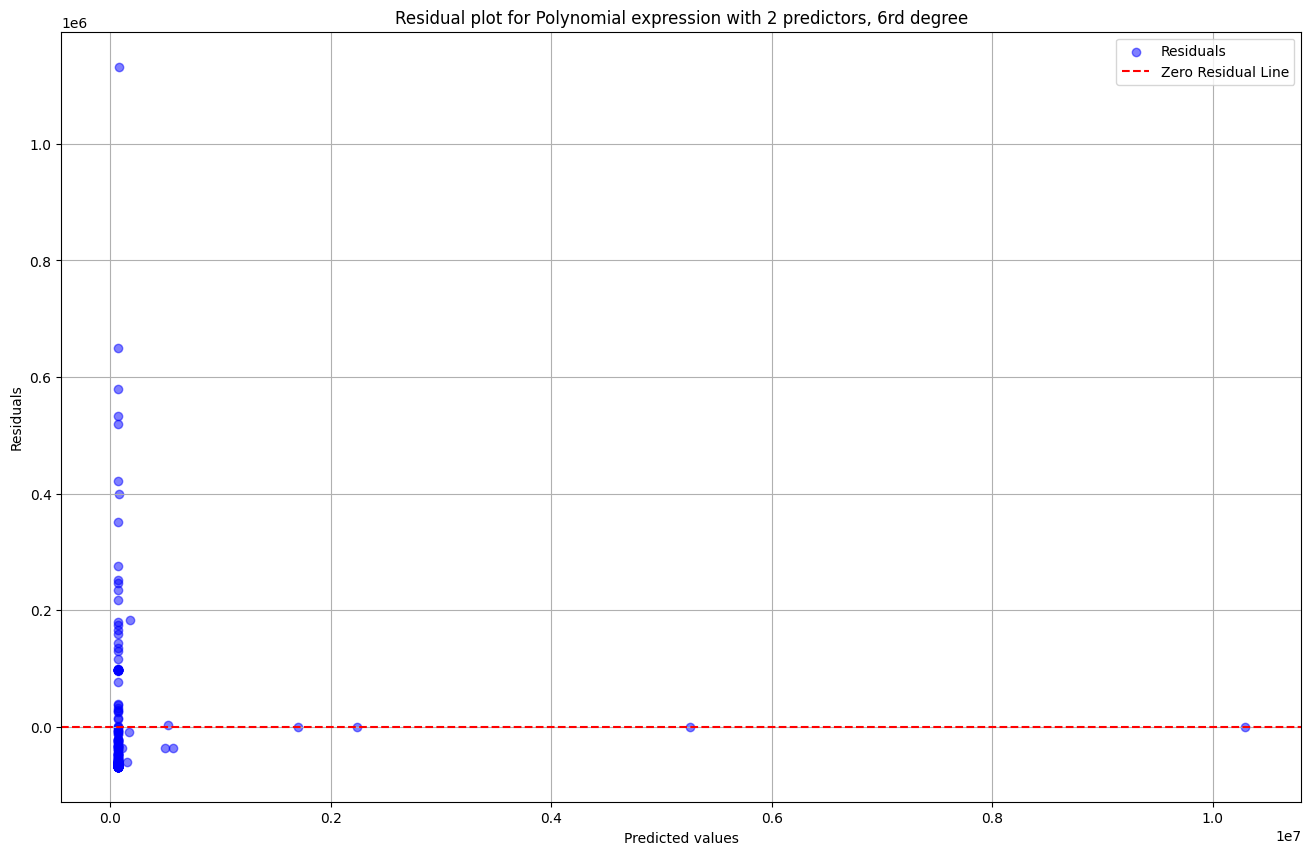

In [206]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

#For population

x1_polly = df['Population']
y_polly = df['CO2 emission']

f1_polly3 = np.polyfit(x1_polly, y_polly, 3)
Yhat1_polly3 = np.poly1d(f1_polly3)
#print(f'{Yhat1_polly3}\n')

f2_polly6 = np.polyfit(x1_polly, y_polly, 6)
Yhat2_polly6 = np.poly1d(f2_polly6)
#print(f'{Yhat2_polly6}\n')

f2_polly9 = np.polyfit(x1_polly, y_polly, 9)
Yhat3_polly9 = np.poly1d(f2_polly9)
#print(f'{Yhat3_polly9}\n')

#For area
x2_polly = df['Area']

f2_polly3 = np.polyfit(x2_polly, y_polly, 3)
Yhat4_polly3 = np.poly1d(f2_polly3)
#print(f'{Yhat4_polly3}\n')

f2_polly6 = np.polyfit(x2_polly, y_polly, 6)
Yhat5_polly6 = np.poly1d(f2_polly6)
#print(f'{Yhat5_polly6}\n')

f2_polly9 = np.polyfit(x2_polly, y_polly, 9)
Yhat6_polly9 = np.poly1d(f2_polly9)
#print(f'{Yhat6_polly9}\n')


#For both

#3rd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
z_polly = df[['Population', 'Area']]
pr_3 = PolynomialFeatures(degree=3)
Z_pr3 = pr_3.fit_transform(z_polly)

lm_poly3 = LinearRegression()
lm_poly3.fit(Z_pr3, y_polly)

#6th degree polynomial
pr_6 = PolynomialFeatures(degree=6)
Z_pr6 = pr_6.fit_transform(z_polly)

lm_poly6 = LinearRegression()
lm_poly6.fit(Z_pr6, y_polly)

#Visualization, 1 predictor
x1_sorted = np.linspace(x1_polly.min(), x1_polly.max(), 217)
x2_sorted = np.linspace(x2_polly.min(), x2_polly.max(), 217)

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.scatter(x1, y, color='black', label='Actual data', alpha=0.6)
plt.plot(x1_sorted, Yhat1_polly3(x1_sorted), label='Degree 3', color='blue')
plt.plot(x1_sorted, Yhat2_polly6(x1_sorted), label='Degree 6', color='orange')
plt.plot(x1_sorted, Yhat3_polly9(x1_sorted), label='Degree 9', color='green')

plt.title('Polynomial Models - Population vs CO2')
plt.xlabel('Population')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x2, y, color='black', label='Actual data', alpha=0.6)
plt.plot(x2_sorted, Yhat4_polly3(x2_sorted), label='Degree 3', color='blue')
plt.plot(x2_sorted, Yhat5_polly6(x2_sorted), label='Degree 6', color='orange')
plt.plot(x2_sorted, Yhat6_polly9(x2_sorted), label='Degree 9', color='green')

plt.title('Polynomial Models - Area vs CO2')
plt.xlabel('Area')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Visualization 2 predictors
def ResidualPlot(model, predictors, actual, model_name):
    predicted = model.predict(predictors)

    residuals = actual - predicted

    plt.figure(figsize=(16, 10))
    plt.scatter(predicted, residuals, alpha=0.5, color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
    plt.title(f'Residual plot for {model_name}')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid()
    plt.show()

ResidualPlot(lm_poly3, Z_pr3, Y, 'Polynomial expression with 2 predictors, 3rd degree')
ResidualPlot(lm_poly6, Z_pr6, Y, 'Polynomial expression with 2 predictors, 6rd degree')


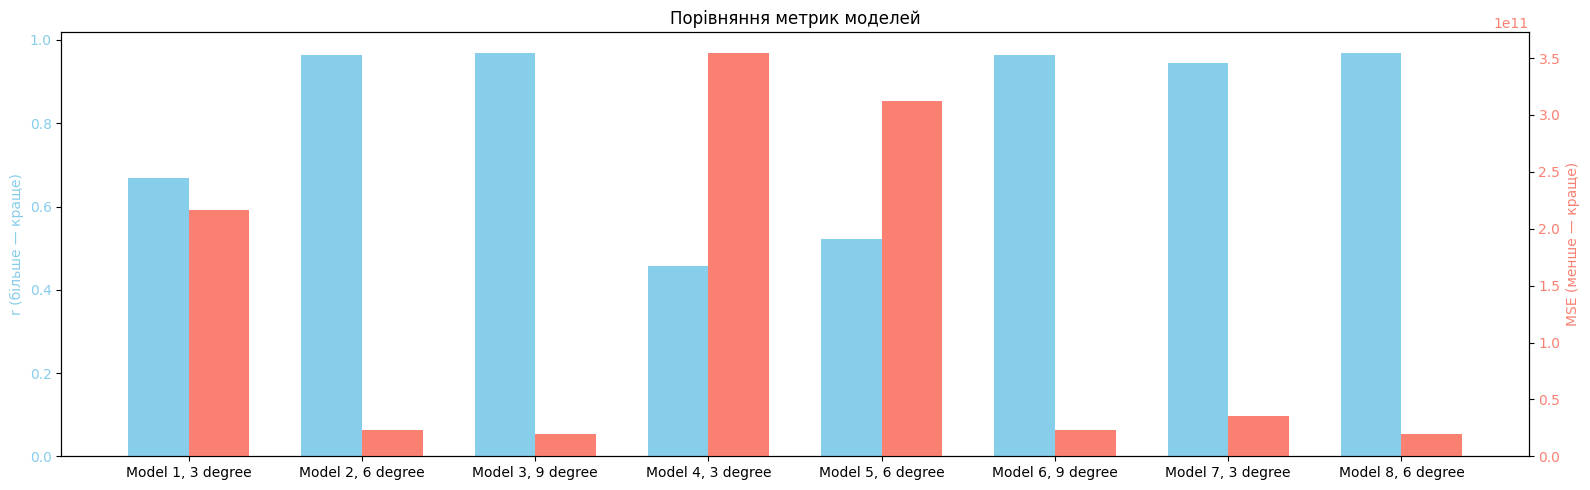

In [180]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Polly 3rd degree, Population
predicted_p1 = Yhat1_polly3(x1_polly)
r_polly_1 = r2_score(y_polly, predicted_p1)
mse_polly1 = mean_squared_error(y_polly, predicted_p1)

#Polly 6th degree, Population
predicted_p2 = Yhat2_polly6(x1_polly)
r_polly_2 = r2_score(y_polly, predicted_p2)
mse_polly2 = mean_squared_error(y_polly, predicted_p2)

#Polly 9th degree, Population
predicted_p3 = Yhat3_polly9(x1_polly)
r_polly_3 = r2_score(y_polly, predicted_p3)
mse_polly3 = mean_squared_error(y_polly, predicted_p3)

#Polly 3rd degree, Area
predicted_p4 = Yhat4_polly3(x2_polly)
r_polly_4 = r2_score(y_polly, predicted_p4)
mse_polly4 = mean_squared_error(y_polly, predicted_p4)

#Polly 6th degree, Area
predicted_p5 = Yhat5_polly6(x2_polly)
r_polly_5 = r2_score(y_polly, predicted_p5)
mse_polly5 = mean_squared_error(y_polly, predicted_p5)

#Polly 9th degree, Area
predicted_p6 = Yhat6_polly9(x2_polly)
r_polly_6 = r2_score(y_polly, predicted_p6)
mse_polly6 = mean_squared_error(y_polly, predicted_p6)

#Polly 3rd degree, both predictors
predicted_p7 = lm_poly3.predict(Z_pr3)
r_polly_7 = r2_score(y_polly, predicted_p7)
mse_polly7 = mean_squared_error(y_polly, predicted_p7)

#Polly 6th degree, both predictors
predicted_p8 = lm_poly6.predict(Z_pr6)
r_polly_8 = r2_score(y_polly, predicted_p8)
mse_polly8 = mean_squared_error(y_polly, predicted_p8)

#Visualization
r_polly = [r_polly_1, r_polly_2, r_polly_3, r_polly_4, r_polly_5, r_polly_6, r_polly_7, r_polly_8]
mse_polly = [mse_polly1, mse_polly2, mse_polly3, mse_polly4, mse_polly5, mse_polly6, mse_polly7, mse_polly8]
degrees = [3, 6, 9, 3, 6, 9, 3, 6]
labels_polly = [f'Model {i+1}, {deg} degree' for i, deg in enumerate(degrees)]

xp = np.arange(len(labels_polly))
width = 0.35
fig, ax1 = plt.subplots(figsize=(16, 5))
bars1 = ax1.bar(xp-width/2, r_polly, width, label='r', color='skyblue')
ax1.set_ylabel('r (більше — краще)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2 = ax1.twinx()
bars2 = ax2.bar(xp + width/2, mse_polly, width, label='MSE', color='salmon')
ax2.set_ylabel('MSE (менше — краще)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')
plt.xticks(xp, labels_polly)
plt.title('Порівняння метрик моделей')
fig.tight_layout()
plt.show()


<p>Найкращими є моделі з одним та двома предикторами 9-го ступеня, тому що у такому випадку R^2 є найбільшим, а MSE - найменшим (на графіку це Model 3 (з предиктором Population), Model 6 (з предиктором Area) та Model 8 (з обома предикторми). Усі ці моделі є поліномами 9-го порядку)</p>

<h2>Виконав студент групи ІП-33<br>  Корольчук Олександр</h2>